In [2]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv("train_cab.csv")

Done some preprocesssing on data in excel. Used special paste to convert all blank cell to 0 and removed the negative fare amounts.

Rest data cleaning will be done in python

In [5]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16062 entries, 0 to 16061
Data columns (total 7 columns):
fare_amount          16062 non-null float64
pickup_datetime      16062 non-null object
pickup_longitude     16062 non-null float64
pickup_latitude      16062 non-null float64
dropoff_longitude    16062 non-null float64
dropoff_latitude     16062 non-null float64
passenger_count      16062 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.5+ KB


In [7]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000,16062.000000
mean,14.996115,-72.462324,39.914475,-72.461865,39.897647,2.616400
std,430.193166,10.579998,6.827635,10.576675,6.188033,60.749527
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992155,40.734936,-73.991182,40.734660,1.000000
50%,8.500000,-73.981697,40.752611,-73.980170,40.753571,1.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
train = train.replace(0,np.NaN)
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [9]:
#Total number of missing values in each variables
missing_val = pd.DataFrame(train.isna().sum())
missing_val

,0
fare_amount,25
pickup_datetime,0
pickup_longitude,315
pickup_latitude,315
dropoff_longitude,314
dropoff_latitude,312
passenger_count,112


These are the number of missing values in each column

No. of missing values in fare_amount seems less and since it is a dependent variable, it is better to not impute it. 

We will remove these missing values from fare amount

In [10]:
train = train.drop(train[train['fare_amount'].isna()].index, axis=0)
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
9,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0
10,5.30,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1.0


In [11]:
missing_val = pd.DataFrame(train.isna().sum())
missing_val

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,313
pickup_latitude,313
dropoff_longitude,312
dropoff_latitude,310
passenger_count,112


In [12]:
train.shape

(16037, 7)

In [13]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16037.000000,15724.000000,15724.000000,15725.000000,15727.000000,15925.00000
mean,15.019492,-73.911747,40.712851,-73.906597,40.687905,2.63288
std,430.527962,2.653722,3.881007,2.705318,2.626874,61.00845
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,0.12000
25%,6.000000,-73.992386,40.736554,-73.991372,40.736285,1.00000
50%,8.500000,-73.982044,40.753297,-73.980570,40.754217,1.00000
75%,12.500000,-73.968077,40.767798,-73.965370,40.768309,2.00000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.00000


Here in the passenger count, min is 0 and max is 5345. The typical range for passengers in a cab is 1 to 6 passengers. 
We will remove all outlier values beyond this range.   

In [14]:
train[(train['passenger_count']>6)|(train['passenger_count']<1)] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,NaN,NaN,NaN,NaN,236.00
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.00
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.00
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.00
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.00
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554.00
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53.00
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35.00
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345.00
1145,8.0,2014-03-27 08:05:01 UTC,-73.991098,40.770655,-73.976933,40.790070,5345.00


In [15]:
#Removing outliers in passenger count
train=train.drop(train[(train['passenger_count']>6)|(train['passenger_count']<1)].index,axis=0) 

In [16]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16017.000000,15706.000000,15706.000000,15707.000000,15709.000000,15905.000000
mean,15.027983,-73.911668,40.712811,-73.906509,40.687840,1.649563
std,430.796603,2.655241,3.883230,2.706866,2.628378,1.265752
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992390,40.736548,-73.991372,40.736295,1.000000
50%,8.500000,-73.982044,40.753299,-73.980568,40.754234,1.000000
75%,12.500000,-73.968067,40.767800,-73.965358,40.768315,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000


Now we will remove the outliers from our co-ordinate data

As we can see from the mean and median of pickup and dropoff longitude and latitude, the co-ordinates seems to be of New York City

The range of co-ordinates of this city are found on web as follows:

"name": "New York",

"min_lat": 40.0000,

"max_lat": 45.0000,

"min_lng": -79.0000,

"max_lng": -71.0000.

In [17]:
#Pickup Longitude and latitude
train[(train["pickup_longitude"]>-71)|(train["pickup_longitude"]<-79)|(train["pickup_latitude"]<40)|\
        (train["pickup_latitude"]>45)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1180,25.0,2012-10-11 00:21:00 UTC,-0.004093,0.033500,0.016852,0.017980,2.0
2144,5.0,2013-05-24 14:54:00 UTC,40.751582,-73.986968,40.758867,-73.978353,2.0
3823,11.0,2013-06-20 04:28:00 UTC,40.719830,-73.988467,40.723305,-73.939430,1.0
4779,6.5,2013-05-22 06:28:00 UTC,40.748262,-73.991840,40.740372,-73.979010,1.0
5682,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0
6701,13.0,2013-05-22 15:33:00 UTC,40.766125,-73.983285,40.757417,-73.977962,2.0
7521,13.0,2013-05-22 10:54:00 UTC,40.760495,-73.973047,40.740367,-73.994392,1.0
8172,10.5,2011-04-08 12:58:26 UTC,-73.967350,39.627358,-73.959343,39.625547,1.0
8330,2.9,2011-02-21 12:16:33 UTC,-73.967160,39.617851,-73.976375,39.605025,1.0
8439,15.0,2013-05-24 00:32:00 UTC,40.729127,-74.006893,40.763367,-73.961550,1.0


In [18]:
#Removing these outliers
train=train.drop(train[(train["pickup_longitude"]>-71)|(train["pickup_longitude"]<-79)|(train["pickup_latitude"]<40)|\
        (train["pickup_latitude"]>45)].index,axis=0)

In [19]:
train[(train["dropoff_longitude"]>-71)|(train["dropoff_longitude"]<-79)|(train["dropoff_latitude"]<40)|\
        (train["dropoff_latitude"]>45)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5860,8.5,2012-03-04 01:35:00 UTC,-73.995030,40.744945,-7.986640,40.729937,1.0
7010,4.5,2011-06-18 04:03:00 UTC,-73.988980,40.721697,-74.001073,0.728087,3.0
12224,16.5,2011-04-26 23:18:56 UTC,-73.993360,40.721749,-73.977370,39.610604,2.0
14531,4.1,2011-04-03 12:16:46 UTC,-73.982155,40.775187,-73.976399,39.610030,1.0


In [20]:
#Removing these outliers
train=train.drop(train[(train["dropoff_longitude"]>-71)|(train["dropoff_longitude"]<-79)|(train["dropoff_latitude"]<40)|\
        (train["dropoff_latitude"]>45)].index,axis=0)

In [21]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15998.000000,15687.000000,15687.000000,15688.000000,15690.000000,15886.000000
mean,15.031491,-73.974815,40.751271,-73.973857,40.751767,1.649647
std,431.052184,0.041538,0.032089,0.039372,0.034021,1.265845
min,0.010000,-74.438233,40.121653,-74.429332,40.164927,1.000000
25%,6.000000,-73.992401,40.736615,-73.991378,40.736368,1.000000
50%,8.500000,-73.982053,40.753350,-73.980599,40.754257,1.000000
75%,12.500000,-73.968108,40.767803,-73.965397,40.768336,2.000000
max,54343.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000


In [22]:
#Reseting index as we need to separate pickup_datetime from dataframe and then merge it again after imputation
#since datetime data is not allowed by KNN's fit transform method.

train= train.reset_index(drop=True)

In [23]:
dt=pd.DataFrame(train.pickup_datetime)

In [24]:
train = train.drop("pickup_datetime", axis=1)
train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,-73.951300,40.774138,-73.990095,40.751048,1.0
8,8.90,-73.980658,40.733873,-73.991540,40.758138,2.0
9,5.30,-73.996335,40.737142,-73.980721,40.733559,1.0


In [25]:
dt

,pickup_datetime
0,2009-06-15 17:26:21 UTC
1,2010-01-05 16:52:16 UTC
2,2011-08-18 00:35:00 UTC
3,2012-04-21 04:30:42 UTC
4,2010-03-09 07:51:00 UTC
5,2011-01-06 09:50:45 UTC
6,2012-11-20 20:35:00 UTC
7,2012-01-04 17:22:00 UTC
8,2009-09-02 01:11:00 UTC
9,2012-04-08 07:30:50 UTC


In [26]:
# -73.987130   40.733143    -73.991567    40.758092   //original
# -73.976899   40.754429    -73.980500    40.750673   //k=3
# -73.979446   40.757761    -73.979776    40.753273   //k=5
# -73.983760   40.758209    -73.985714    40.758140   //k=10 <--- This seems better approximation
# -73.984522   40.753675    -73.984835    40.754035   //k=15

train['pickup_longitude'].loc[3] = np.nan
train['pickup_latitude'].loc[3] = np.nan
train['dropoff_longitude'].loc[3] = np.nan
train['dropoff_latitude'].loc[3] = np.nan

In [27]:
#Now imputing using KNN imputation
train = pd.DataFrame(KNN(k = 10).fit_transform(train),columns = train.columns)

Imputing row 1/15998 with 0 missing, elapsed time: 37.938
Imputing row 101/15998 with 0 missing, elapsed time: 37.938
Imputing row 201/15998 with 0 missing, elapsed time: 37.938
Imputing row 301/15998 with 0 missing, elapsed time: 37.938
Imputing row 401/15998 with 0 missing, elapsed time: 37.938
Imputing row 501/15998 with 0 missing, elapsed time: 37.938
Imputing row 601/15998 with 0 missing, elapsed time: 37.938
Imputing row 701/15998 with 0 missing, elapsed time: 37.938
Imputing row 801/15998 with 0 missing, elapsed time: 37.938
Imputing row 901/15998 with 0 missing, elapsed time: 37.938
Imputing row 1001/15998 with 0 missing, elapsed time: 37.938
Imputing row 1101/15998 with 0 missing, elapsed time: 37.938
Imputing row 1201/15998 with 0 missing, elapsed time: 37.938
Imputing row 1301/15998 with 0 missing, elapsed time: 37.954
Imputing row 1401/15998 with 0 missing, elapsed time: 37.954
Imputing row 1501/15998 with 0 missing, elapsed time: 37.954
Imputing row 1601/15998 with 0 missi

In [28]:
train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1.000000
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1.000000
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2.000000
3,7.70,-73.983760,40.758209,-73.985714,40.758140,1.000000
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1.000000
5,12.10,-74.000964,40.731630,-73.972892,40.758233,1.000000
6,7.50,-73.980002,40.751662,-73.973802,40.764842,1.000000
7,16.50,-73.951300,40.774138,-73.990095,40.751048,1.000000
8,8.90,-73.980658,40.733873,-73.991540,40.758138,2.000000
9,5.30,-73.996335,40.737142,-73.980721,40.733559,1.000000


In [29]:
train= pd.concat([train,dt], axis=1, sort=False)

In [30]:
train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1.000000,2009-06-15 17:26:21 UTC
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1.000000,2010-01-05 16:52:16 UTC
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2.000000,2011-08-18 00:35:00 UTC
3,7.70,-73.983760,40.758209,-73.985714,40.758140,1.000000,2012-04-21 04:30:42 UTC
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1.000000,2010-03-09 07:51:00 UTC
5,12.10,-74.000964,40.731630,-73.972892,40.758233,1.000000,2011-01-06 09:50:45 UTC
6,7.50,-73.980002,40.751662,-73.973802,40.764842,1.000000,2012-11-20 20:35:00 UTC
7,16.50,-73.951300,40.774138,-73.990095,40.751048,1.000000,2012-01-04 17:22:00 UTC
8,8.90,-73.980658,40.733873,-73.991540,40.758138,2.000000,2009-09-02 01:11:00 UTC
9,5.30,-73.996335,40.737142,-73.980721,40.733559,1.000000,2012-04-08 07:30:50 UTC


In [31]:
missing_val = pd.DataFrame(train.isna().sum())
missing_val

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_datetime,0


In [32]:
train1=train.copy()

In [33]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000
mean,15.031491,-73.974692,40.751282,-73.973745,40.751770,1.649939
std,431.052184,0.041816,0.032198,0.039185,0.033757,1.262509
min,0.010000,-74.438233,40.121653,-74.429332,40.164927,1.000000
25%,6.000000,-73.992218,40.736860,-73.991205,40.736766,1.000000
50%,8.500000,-73.981995,40.753207,-73.980475,40.754190,1.000000
75%,12.500000,-73.968158,40.767496,-73.965503,40.768135,2.000000
max,54343.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000


In [34]:
#Converting passenger count from float to int
train1['passenger_count']=train1['passenger_count'].astype(int)

In [35]:
train1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21 UTC
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16 UTC
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00 UTC
3,7.7,-73.983760,40.758209,-73.985714,40.758140,1,2012-04-21 04:30:42 UTC
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00 UTC


All other columns are taken care of missing values and outliers

Now we will check fare amount

Since Base amount in to rent a cab in NYC is \\$2.5 and values beyond \\$150 for travel within the city dosent look right, we will remove these values

In [36]:
train1[(train1['fare_amount']<2.5)|(train1['fare_amount']>150)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime
591,453.00,-74.007816,40.733536,-73.986556,40.740040,1,2011-03-03 07:40:59 UTC
957,434.00,-73.990602,40.761100,-73.960025,40.779580,2,2011-10-24 22:54:00 UTC
991,54343.00,-74.003319,40.727455,-73.964470,40.764378,1,2015-02-27 17:03:50 UTC
1047,4343.00,-73.976309,40.751634,-74.014854,40.709044,1,2012-01-15 20:42:04 UTC
1303,180.00,-74.429332,40.500046,-74.429332,40.500046,1,2013-01-16 20:19:58 UTC
1395,1.14,-73.862829,40.769014,-73.982075,40.723854,1,2014-05-31 15:53:02 UTC
1451,165.00,-73.633363,41.032490,-73.633671,41.032598,1,2009-08-07 21:49:13 UTC
2740,0.01,-73.939041,40.713963,-73.941673,40.713997,1,2015-05-01 15:38:41 UTC


In [37]:
train1=train1.drop(train1[(train1['fare_amount']<2.5)|(train1['fare_amount']>150)].index,axis=0)

In [38]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000
mean,11.291723,-73.974689,40.751283,-73.973738,40.751773,1.647280
std,9.482714,0.041572,0.032065,0.038933,0.033628,1.263037
min,2.500000,-74.438233,40.121653,-74.227047,40.164927,1.000000
25%,6.000000,-73.992214,40.736874,-73.991205,40.736781,1.000000
50%,8.500000,-73.981995,40.753211,-73.980475,40.754194,1.000000
75%,12.500000,-73.968163,40.767496,-73.965510,40.768135,2.000000
max,128.830000,-73.137393,41.366138,-73.137393,41.366138,6.000000


## Haversine Distance Formula
We need to calculate the haversine distance

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, 

R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [39]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train1]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles if u need calc in miles
        
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
        i['H_Distance'] = d
        
    return d

In [40]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0         1.030764
1         8.450134
2         1.389525
3         0.164784
4         1.999157
5         3.787239
6         1.555807
7         4.155444
8         2.849627
9         1.374577
10        0.139835
11        0.717767
12        2.019384
13        1.671445
14        0.236791
15        2.609774
16        1.511904
17        0.921952
18        0.399179
19        1.686861
20        2.292470
21        0.924296
22        1.403958
23        1.017773
24        2.531947
25        0.328771
26        4.073463
27        0.808153
28        0.871913
29        6.703552
           ...    
15968     1.711032
15969     2.941770
15970     1.981039
15971     1.456346
15972     3.253381
15973     2.546337
15974     1.755990
15975     3.105214
15976     1.442334
15977     1.756779
15978     0.780375
15979     3.713784
15980     4.806617
15981     1.886438
15982     3.756046
15983     1.432945
15984     0.881922
15985     1.431465
15986    14.022308
15987    11.264178
15988     1.232410
15989     1.

In [41]:
#Haversine distance is in kilometers
train1

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21 UTC,1.030764
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16 UTC,8.450134
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00 UTC,1.389525
3,7.70,-73.983760,40.758209,-73.985714,40.758140,1,2012-04-21 04:30:42 UTC,0.164784
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00 UTC,1.999157
5,12.10,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06 09:50:45 UTC,3.787239
6,7.50,-73.980002,40.751662,-73.973802,40.764842,1,2012-11-20 20:35:00 UTC,1.555807
7,16.50,-73.951300,40.774138,-73.990095,40.751048,1,2012-01-04 17:22:00 UTC,4.155444
8,8.90,-73.980658,40.733873,-73.991540,40.758138,2,2009-09-02 01:11:00 UTC,2.849627
9,5.30,-73.996335,40.737142,-73.980721,40.733559,1,2012-04-08 07:30:50 UTC,1.374577


Text(0, 0.5, 'fare')

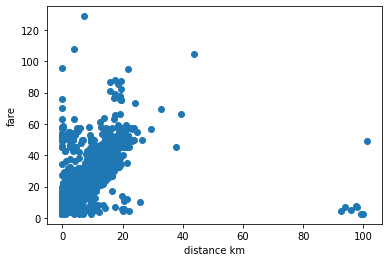

In [42]:
plt.scatter(train1.H_Distance, train1.fare_amount)
plt.xlabel('distance km')
plt.ylabel('fare')

There are outliers for which distance is 100km but fare is close to \\$5 and also some have distance less than
20km but fare is above \\$80

In [43]:
train1[(train1.H_Distance>60)|(train1.fare_amount>80)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
457,2.50,-73.157727,41.350052,-74.005433,40.726685,2,2009-02-22 22:48:00 UTC,99.294134
1650,2.50,-73.137393,41.366138,-73.996510,40.745320,2,2009-05-02 19:01:01 UTC,99.771579
3035,6.90,-73.137393,41.366138,-73.974598,40.751311,1,2009-01-06 10:53:36 UTC,97.985088
4446,4.90,-73.137393,41.366138,-73.957685,40.765644,1,2009-08-26 07:43:16 UTC,95.852036
4579,85.50,-73.978860,40.752523,-74.183955,40.691392,1,2012-08-21 20:53:00 UTC,18.572564
5621,49.15,-73.137393,41.366138,-74.000940,40.731723,1,2009-02-25 07:05:05 UTC,101.094619
6586,128.83,-73.872741,40.741816,-73.891478,40.804164,1,2014-05-16 01:51:00 UTC,7.110058
7355,4.50,-73.900571,40.764047,-73.137393,41.366138,1,2009-07-16 09:41:26 UTC,92.605848
7763,95.00,-73.862951,40.768771,-73.652193,40.657995,2,2011-10-03 08:50:35 UTC,21.616360
9370,88.00,-73.989335,40.744471,-74.183504,40.688282,1,2014-04-25 14:49:20 UTC,17.516711


Text(0, 0.5, 'fare')

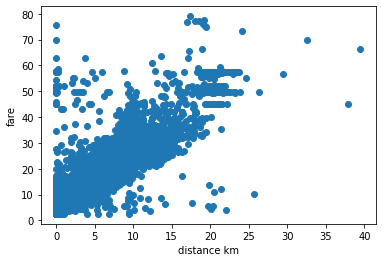

In [55]:
plt.scatter(train1.H_Distance, train1.fare_amount)
plt.xlabel('distance km')
plt.ylabel('fare')

In [58]:
train1[(train1.H_Distance==0)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
487,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,2010-01-19 01:10:00 UTC,0.0
641,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,2009-08-25 01:50:21 UTC,0.0
1387,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,2013-07-21 00:10:23 UTC,0.0
1739,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,2012-08-27 15:24:00 UTC,0.0
4326,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,2014-01-13 16:14:48 UTC,0.0
4912,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,2010-01-10 13:44:35 UTC,0.0
5407,2.5,-73.934094,40.751906,-73.934094,40.751906,1.0,2010-07-17 06:24:04 UTC,0.0
6588,2.5,-74.001027,40.727612,-74.001027,40.727612,1.0,2010-07-28 17:37:49 UTC,0.0
7362,2.5,-73.960443,40.761375,-73.960443,40.761375,1.0,2011-01-18 16:07:22 UTC,0.0
8653,2.5,-73.978626,40.744067,-73.978626,40.744067,1.0,2013-01-02 09:33:21 UTC,0.0


In [59]:
#Still there are some values where dist is 0 and fare amount is high, lets check
temp=train1[(train1.H_Distance==0)].copy()

As we see there are lot of datapoints with distance as 0. Now 0 distance could indicate a round trip and we need to calculate distace traveled in some other way. Just for these datapoints, we can calculate distance from the fare amount.

The formula for that is:

distance = (fare_amount - 2.5)/1.56

2.5 is the base rate and 1.56 is cost per km.

In [60]:
temp

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
487,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,2010-01-19 01:10:00 UTC,0.0
641,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,2009-08-25 01:50:21 UTC,0.0
1387,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,2013-07-21 00:10:23 UTC,0.0
1739,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,2012-08-27 15:24:00 UTC,0.0
4326,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,2014-01-13 16:14:48 UTC,0.0
4912,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,2010-01-10 13:44:35 UTC,0.0
5407,2.5,-73.934094,40.751906,-73.934094,40.751906,1.0,2010-07-17 06:24:04 UTC,0.0
6588,2.5,-74.001027,40.727612,-74.001027,40.727612,1.0,2010-07-28 17:37:49 UTC,0.0
7362,2.5,-73.960443,40.761375,-73.960443,40.761375,1.0,2011-01-18 16:07:22 UTC,0.0
8653,2.5,-73.978626,40.744067,-73.978626,40.744067,1.0,2013-01-02 09:33:21 UTC,0.0


In [61]:
temp['H_Distance'] = temp.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

In [62]:
temp

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
487,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,2010-01-19 01:10:00 UTC,0.0
641,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,2009-08-25 01:50:21 UTC,0.0
1387,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,2013-07-21 00:10:23 UTC,0.0
1739,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,2012-08-27 15:24:00 UTC,0.0
4326,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,2014-01-13 16:14:48 UTC,0.0
4912,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,2010-01-10 13:44:35 UTC,0.0
5407,2.5,-73.934094,40.751906,-73.934094,40.751906,1.0,2010-07-17 06:24:04 UTC,0.0
6588,2.5,-74.001027,40.727612,-74.001027,40.727612,1.0,2010-07-28 17:37:49 UTC,0.0
7362,2.5,-73.960443,40.761375,-73.960443,40.761375,1.0,2011-01-18 16:07:22 UTC,0.0
8653,2.5,-73.978626,40.744067,-73.978626,40.744067,1.0,2013-01-02 09:33:21 UTC,0.0


In [51]:
train1.update(temp)

In [56]:
train1[(train1.H_Distance==0)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
487,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,2010-01-19 01:10:00 UTC,0.0
641,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,2009-08-25 01:50:21 UTC,0.0
1387,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,2013-07-21 00:10:23 UTC,0.0
1739,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,2012-08-27 15:24:00 UTC,0.0
4326,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,2014-01-13 16:14:48 UTC,0.0
4912,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,2010-01-10 13:44:35 UTC,0.0
5407,2.5,-73.934094,40.751906,-73.934094,40.751906,1.0,2010-07-17 06:24:04 UTC,0.0
6588,2.5,-74.001027,40.727612,-74.001027,40.727612,1.0,2010-07-28 17:37:49 UTC,0.0
7362,2.5,-73.960443,40.761375,-73.960443,40.761375,1.0,2011-01-18 16:07:22 UTC,0.0
8653,2.5,-73.978626,40.744067,-73.978626,40.744067,1.0,2013-01-02 09:33:21 UTC,0.0


There are some enteries where fare amount is exactly 2.5. This means that the passenger booked the cab but then later cancelled it without completing the ride. Thus, we remove such entries.

In [63]:
#We need to remove these values as distance cannot be 0
train1=train1.drop(train1[(train1.H_Distance==0)].index,axis=0)

In [65]:
train1.shape

(15956, 8)

Text(0, 0.5, 'fare')

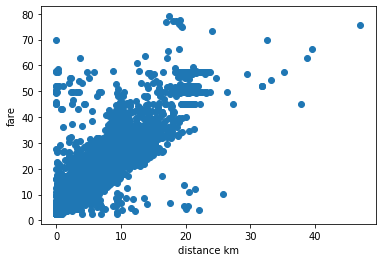

In [67]:
plt.scatter(train1.H_Distance, train1.fare_amount)
plt.xlabel('distance km')
plt.ylabel('fare')

### Exploratory Data Analysis
Following things need to be verified during EDA for their effect on fare amount:

- No. of passenger
- Year 
- Month
- Date
- Day
- Hour


In [68]:
#Converting pickup_datetime into datetime format
train1['pickup_datetime']=pd.to_datetime(train1['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
train1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00,1.389525
3,7.7,-73.983760,40.758209,-73.985714,40.758140,1.0,2012-04-21 04:30:42,0.164784
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00,1.999157


In [69]:
data = [train1]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [70]:
train1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21,1.030764,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16,8.450134,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00,1.389525,2011,8,18,3,0
3,7.7,-73.983760,40.758209,-73.985714,40.758140,1.0,2012-04-21 04:30:42,0.164784,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00,1.999157,2010,3,9,1,7


In [71]:
missing_val = pd.DataFrame(train1.isna().sum())
missing_val

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_datetime,0
H_Distance,0
Year,0
Month,0


The Dataset is all clean and ready now

Lets start EDA

In [72]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000
mean,11.242702,-73.975116,40.751077,-73.973909,40.751712,1.648283,3.333195,2011.732013,6.263537,15.665204,3.033843,13.506017
std,9.218853,0.037878,0.029755,0.037036,0.032814,1.264023,3.648814,1.864210,3.449295,8.686321,1.969045,6.516082
min,2.500000,-74.438233,40.121653,-74.227047,40.164927,1.000000,0.000111,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992223,40.736864,-73.991196,40.736808,1.000000,1.253746,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.982017,40.753207,-73.980479,40.754212,1.000000,2.166803,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.968224,40.767477,-73.965571,40.768127,2.000000,3.885805,2013.000000,9.000000,23.000000,5.000000,19.000000
max,79.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,46.987179,2015.000000,12.000000,31.000000,6.000000,23.000000


In [73]:
cnames =  ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',\
           'passenger_count','H_Distance','Year','Month','Date','Day of Week','Hour']

In [74]:
df_corr=train1.loc[:,cnames]
corr = df_corr.corr()

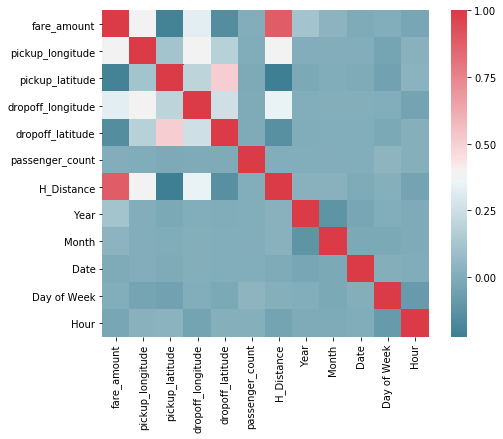

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

There is strong correlation between H_dist and fare amount as expected

Apart from that, there isn't strong correlation among the independent variables, thus we need not remove any variables as
there will not be any redundancy.

### Affect of No. of passengers on the fare

Text(0, 0.5, 'Frequency')

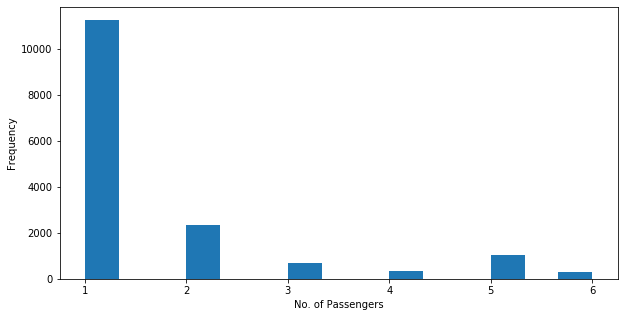

In [76]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

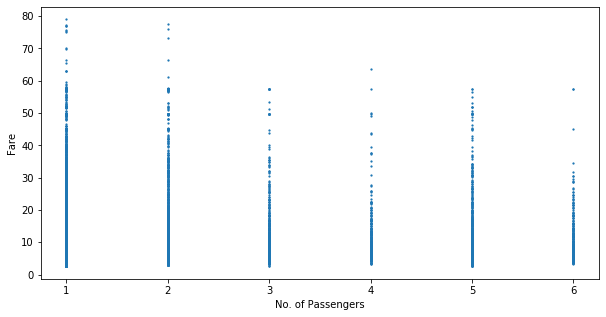

In [77]:
#No. of passengers vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['passenger_count'], y=train1['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Most fare comes from single or double passenger rides

### Affect of Year on the Fare

Text(0, 0.5, 'Frequency')

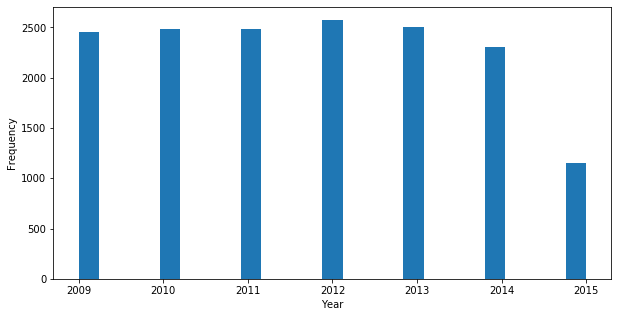

In [78]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['Year'], bins=25)
plt.xlabel('Year')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

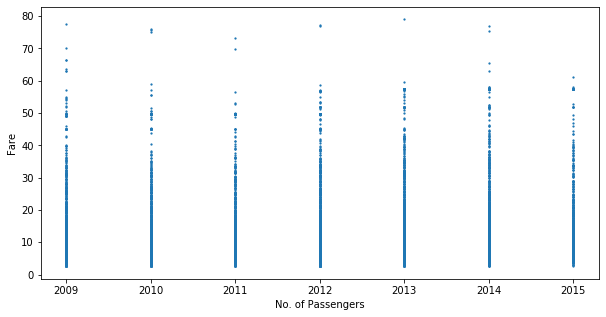

In [79]:
#Year vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['Year'], y=train1['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

The frequency of no. of cabs from year 2015 is the least. However, the prices look consistent over the years 

### Affect of Month on the Fare

Text(0, 0.5, 'Frequency')

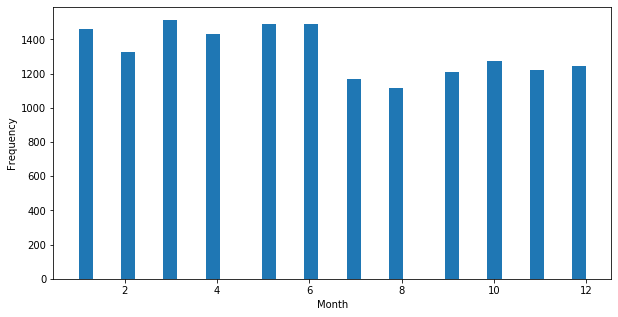

In [80]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['Month'], bins=36)
plt.xlabel('Month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

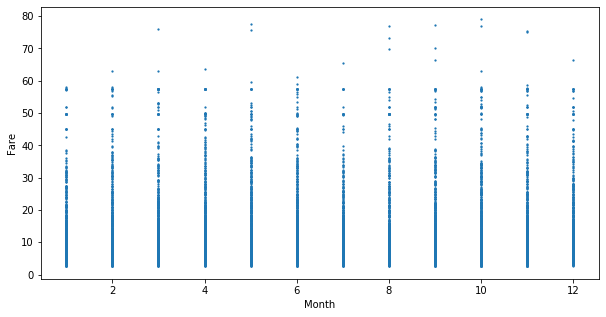

In [81]:
#Month vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['Month'], y=train1['fare_amount'], s=1.5)
plt.xlabel('Month')
plt.ylabel('Fare')

Here we can see frequency of cabs is less from July to December and in this interval, some datapoints seem to be high. 

### Affect of Date on the Fare

Text(0, 0.5, 'Frequency')

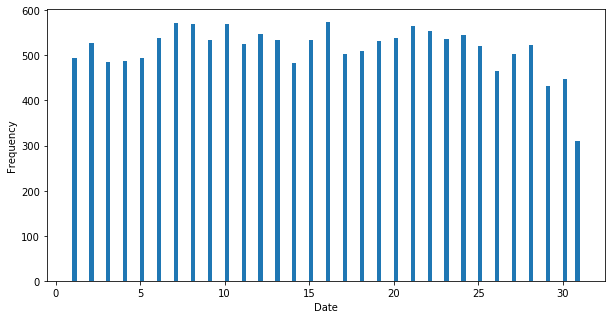

In [82]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['Date'], bins=120)
plt.xlabel('Date')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

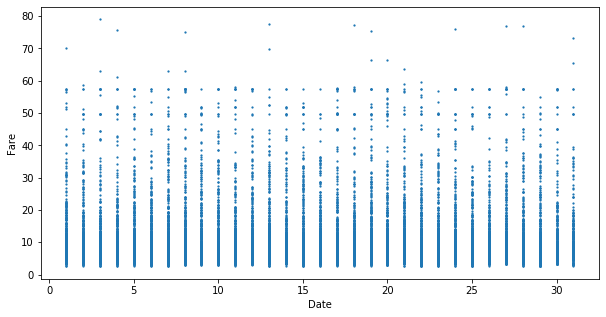

In [83]:
#Date vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['Date'], y=train1['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The frequency is less during end of the month, but prices are consistent. 

### Affect of Day of Week on the Fare

Text(0, 0.5, 'Frequency')

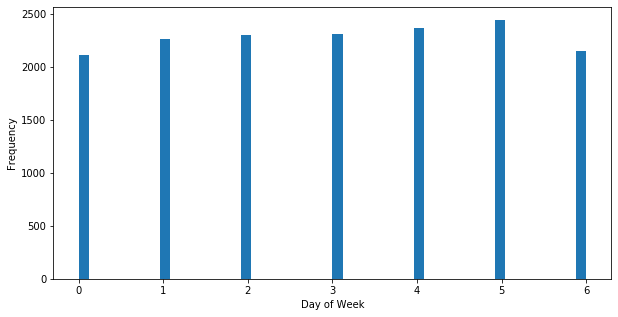

In [84]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['Day of Week'], bins=50)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

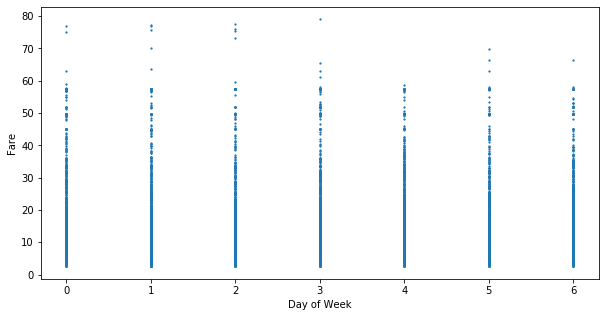

In [85]:
#Day of Week vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['Day of Week'], y=train1['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest frequency is on Friday and Saturday (weekends). While the prices aren't affected that much. 

### Affect of Hour on the Fare

Text(0, 0.5, 'Frequency')

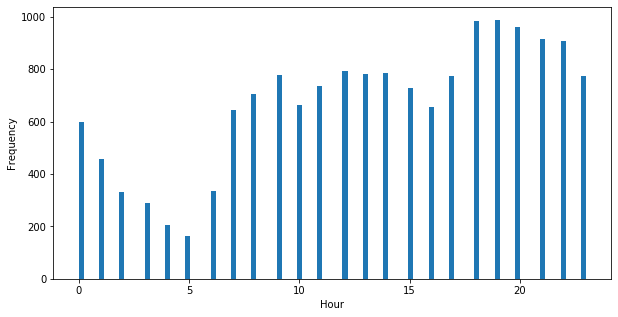

In [86]:
#Frequency distribution
plt.figure(figsize=(10,5))
plt.hist(train1['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

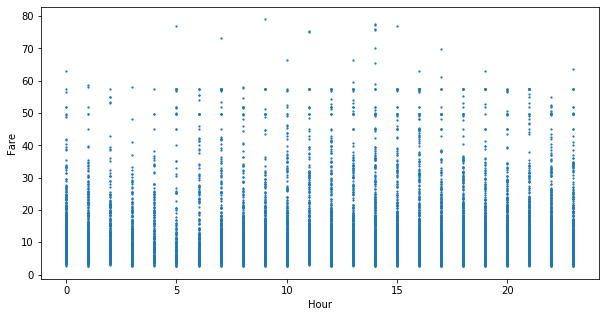

In [87]:
#Hour vs. fare amount
plt.figure(figsize=(10,5))
plt.scatter(x=train1['Hour'], y=train1['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Frequency during midnight hours is less and at 5am its the least. Yet the fares are comparable to those during working hours.

Text(0, 0.5, 'Fare')

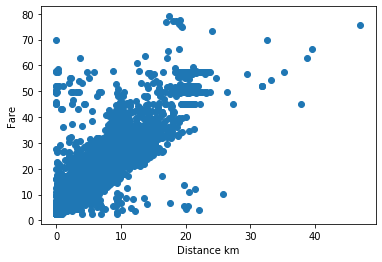

In [88]:
plt.scatter(train1.H_Distance, train1.fare_amount)
plt.xlabel('Distance km')
plt.ylabel('Fare')

The graph shows a fairly linear relationship between H-distance and fare amount. This is a great feature for our model development.

There are outliers in the data, but they are not extreme. There may be some cases where the waiting time, toll, day of the
week, hour ,year etc could be the reason for high fare at low distances or vice versa.

In [89]:
train1=train1.drop("pickup_datetime",axis=1)

In [90]:
train1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011,8,18,3,0
3,7.7,-73.983760,40.758209,-73.985714,40.758140,1.0,0.164784,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010,3,9,1,7


In [91]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
count,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000,15956.000000
mean,11.242702,-73.975116,40.751077,-73.973909,40.751712,1.648283,3.333195,2011.732013,6.263537,15.665204,3.033843,13.506017
std,9.218853,0.037878,0.029755,0.037036,0.032814,1.264023,3.648814,1.864210,3.449295,8.686321,1.969045,6.516082
min,2.500000,-74.438233,40.121653,-74.227047,40.164927,1.000000,0.000111,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992223,40.736864,-73.991196,40.736808,1.000000,1.253746,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.982017,40.753207,-73.980479,40.754212,1.000000,2.166803,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.968224,40.767477,-73.965571,40.768127,2.000000,3.885805,2013.000000,9.000000,23.000000,5.000000,19.000000
max,79.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,46.987179,2015.000000,12.000000,31.000000,6.000000,23.000000


In [93]:
train1= train1.reset_index(drop=True)

In [97]:
train1.to_csv('train_clean.csv',index=False)

### The train data is cleaned!!!
We will now use this data to train our model